# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [78]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


##Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

PCA should be good at helping us reduce the dimensions of our dataset.
ICA could give us nice ideas of things to explore in the data and get more insights.

In [79]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(data)

# Print the components and the amount of variance in the data contained in each dimension
print pca.components_
print pca.explained_variance_ratio_

[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

The variance drops from 40% to 7% between the 2nd and the 3rd components. I would choose to keep only 2 dimensions. Since only 2 variables explains 85% of the variance, I can do some as simple as plotting the data points to think about how to group them.

**3)** What do the dimensions seem to represent? How can you use this information?

The first component has a lot of weight on Fresh items. 70% of its variation comes from the spending in Fresh items. Buyers tend to differenciate through this items.

The second parameter is at 70 % a mix of Milk and Grocery. I did not find a clue about what products fall in that Grocery category that is really prone to interpretation. I would say we can call Milk + Grocery, Grocery!.

Now all we are left with conceptuatually are 2 dimensions to rank our clients. To make things simple, we will have :
- Customers who order a lot of Fresh items and a lot of Grocery
- Customers who order a lot of Fresh items and few Grocery items
- Customers who order few Fresh items and a lot of Grocery items
- Customers who order few Fresh items and few Grocery items

We hence have four groups that we could make 2 only... But that's for later on

In [80]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


###ICA

In [81]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
from sklearn.preprocessing import StandardScaler
data_centered = StandardScaler().fit_transform(data)

ica = FastICA().fit(data_centered)

# Print the independent components
print ica.components_

[[-0.00267551  0.01398762 -0.06019735 -0.00204623  0.00292228  0.00398586]
 [ 0.00381139 -0.01685872 -0.11493536  0.00707932  0.13437572  0.01615338]
 [ 0.01093139  0.00103272 -0.00735102 -0.05404887  0.00265253  0.01676769]
 [-0.05022491  0.00631844  0.00582973  0.00328932 -0.00971138  0.00295486]
 [ 0.00488074  0.00161842  0.00571326  0.00253186 -0.00243339 -0.05096617]
 [-0.00193419 -0.07259955  0.05507896  0.00177117 -0.01567971  0.01707381]]


**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

- Decomposition 1 : Customers who order Grocery
- Decomposition 2 : Customers who order Detergent paper and no grocery Vs those who order Grocery and no Detergent paper
- Decomposition 3 : Customers who order Grocery and no milk Vs those who order milk and no Grocery
- Decomposition 4 : Customers who order Delicatessen
- Decomposition 5 : Customers who order Fresh
- Decomposition 6 : Customers who order Frozen

It gives us an interstering way to explore the data graphically, it gives us insight on the combinaison of parameters that are worth trying first, since they are considered as being as closely independant as possible.

It comes to my mind that could make a good preprocessing step in case we were using a Naive Bayes Algorithm (I'm just saying this on the basis of intuition).


##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

[According to scikit learn](http://scikit-learn.org/stable/modules/mixture.html#gmm) : *"One can think of mixture models as generalizing k-means clustering to incorporate information about the covariance structure of the data as well as the centers of the latent Gaussians."*

Gaussian Mixture Model is a probabilistic wheras K-Means minimizes the distance between the centroids and the data points.

Gaussian Mixture Model allows us to draw much more complicated boundaries between clusters of points which can be very interesing to separate the clusters when lines cannot capture properly what differentiate data points.

K-means none is much simpler to understand and it is sometimes armful to choose unecessary complexity. 

In our case, we want to be able to explain our data as simply as possible, hence choosing the K-Means approach.


**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [82]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [83]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation

reduced_data = PCA(n_components=2).fit_transform(data)
print reduced_data[:10]  # print upto 10 elements

[[  -650.02212207   1585.51909007]
 [  4426.80497937   4042.45150884]
 [  4841.9987068    2578.762176  ]
 [  -990.34643689  -6279.80599663]
 [-10657.99873116  -2159.72581518]
 [  2765.96159271   -959.87072713]
 [   715.55089221  -2013.00226567]
 [  4474.58366697   1429.49697204]
 [  6712.09539718  -2205.90915598]
 [  4823.63435407  13480.55920489]]


In [84]:
#clusters = GMM(n_components=3, covariance_type='spherical').fit(reduced_data)
#print clusters

In [85]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'

clusters = KMeans(n_clusters=3).fit(reduced_data)
print clusters

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


In [86]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [87]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

centroids = clusters.cluster_centers_
#centroids = clusters.means_
print centroids

[[  4106.90273941  -3168.41202086]
 [  1497.13461172  24998.27760147]
 [-24220.71188261  -4364.45560022]]


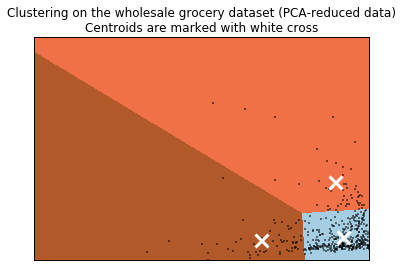

In [88]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

**7)** What are the central objects in each cluster? Describe them as customers.

The central objects are the centroids. 
They represent the average location of the points located in their cluster.

The left cluster is made of **premium customers who order a lot more fresh products**.

the top cluster is made of **premium customers who order Grocery (and Milk)**

The right bottom dense cluster order comparatively low quantities of those.

###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

The variance in the data being quite important, PCA resulted in being powerful approach. 

KMeans came as a nice complement to draw a line between clusters and effectitvely deciding on our segments.

**9)** How would you use that technique to help the company design new experiments?

Sorry, the question feels really vague... Would need to know what would be for instance the goal of those experiments.

**10)** How would you use that data to help you predict future customer needs?

We could check from which cluster is the customer (eg. : fresh product distributor) and take the mean of all the customers in this cluster (or do something more complex like a regression if needeed).